In [1]:
import numpy as np


In [2]:
M_solar = 2 * 10**30 #kg
M_BH = 10**7 *M_solar
E_p = np.logspace(-3, 6,1000)
B = 6 #>6kG
gamma_p = 2.1
m_p = 0.936#MeV/c^2
e = 1
q = 5/3 
tau_T = 0.5
G = 6.67 * 10**-11#m^3/kg s^2
L_X = 7 * 10**43 #erg/s
eta = 10 * (B/6)**2#B/6(kG)
c = 3 * 10**8
R_s = (2 * G * M_BH)/c**2
R = 17*R_s
sigma_T =1
n_p = 3**0.5 * tau_T / (sigma_T * R)
v_A = B/(4 * np.pi* m_p * n_p)**0.5
E_p_max = 3 * 10**5 *(B/10)**4 * (R/(25*R_s))**(5/3) * (M_BH/(2 * 10**7 * M_solar))**(5/3) * (25/eta)**3 * (0.5/tau_T)**(3/2)#(3 * v_A / (eta * c))**(1/(2-q))
t_diff = (3 * 3**0.5)/(eta * c) *((e * B * R)/(3**0.5 * E_p))**(1/3)
sigma_pp = 1
k_pp = 0.5
tau_pp = n_p * k_pp * sigma_pp * c *t_diff
X = (1-np.exp(-(E_p)/(m_p * c**2))) * (E_p)**-gamma_p * np.exp(-E_p/E_p_max)
integrand = E_p * X * (1 - np.exp(-tau_pp))
E_nu = 0.5 * (integrand)#E_nu**2 dN_nu/dE_nu

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

M_solar = 2 * 10**30 #kg
M_BH = 10**7 * M_solar# kg
E_p = np.logspace(-3, 6, 1000)#GeV
B = 6 # >6kG
gamma_p = 2.1
m_p = 0.936 # MeV/c^2
e = 1 #???
q = 5/3 
tau_T = 0.5
G = 6.67 * 10**-11 # m^3/kg s^2
L_X = 7 * 10**43 # erg/s
eta = 10 * (B/6)**2 # B/6(kG)
c = 3 * 10**8
R_s = (2 * G * M_BH) / c**2
R = 17 * R_s
sigma_T = 1 #??
n_p = 3**0.5 * tau_T / (sigma_T * R)
v_A = B / (4 * np.pi * m_p * n_p)**0.5
E_p_max = 3 * 10**5 * (B/10)**4 * (R/(25 * R_s))**(5/3) * (M_BH/(2 * 10**7 * M_solar))**(5/3) * (25/eta)**3 * (0.5/tau_T)**(3/2)
t_diff = (3 * 3**0.5) / (eta * c) * ((e * B * R) / (3**0.5 * E_p))**(1/3)
sigma_pp = 1
k_pp = 0.5
tau_pp = n_p * k_pp * sigma_pp * c * t_diff

def integrand(E_p):
    X = (1 - np.exp(-(E_p) / (m_p * c**2))) * (E_p)**-gamma_p * np.exp(-E_p / E_p_max)
    return E_p * X * (1 - np.exp(-tau_pp))

results{E_p}= quad(integrand, E_p[0], E_p[-1])

E_nu = 0.5 * results{E_p}  # E_nu**2 dN_nu/dE_nu

plt.plot(E_p, E_nu, label='E_p * X * (1 - np.exp(-tau_pp))')
plt.xlabel('E_p')
plt.ylabel('E_p * X * (1 - np.exp(-tau_pp))')
plt.title('Plot of E_p * X * (1 - np.exp(-tau_pp)) with respect to E_p')
plt.legend()
plt.show()


TypeError: only size-1 arrays can be converted to Python scalars

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


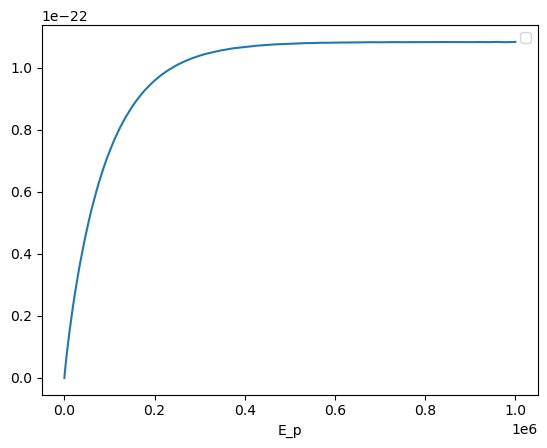

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from numpy import vectorize

M_solar = 2 * 10**30  # kg
M_BH = 10**7 * M_solar  # kg
E_p = np.logspace(-3, 6, 1000)  # GeV
B = 6  # >6kG
gamma_p = 2.1
m_p = 0.936  # MeV/c^2
e = 1  # ???
q = 5/3 
tau_T = 0.5
G = 6.67 * 10**-11  # m^3/kg s^2
L_X = 7 * 10**43  # erg/s
eta = 10 * (B/6)**2  # B/6(kG)
c = 3 * 10**8
R_s = (2 * G * M_BH) / c**2
R = 17 * R_s
#sigma_T = 1  # ??
#n_p = 3**0.5 * tau_T / (sigma_T * R)
#v_A = B / (4 * np.pi * m_p * n_p)**0.5
E_p_max = 3 * 10**5 * (B/10)**4 * (R/(25 * R_s))**(5/3) * (M_BH/(2 * 10**7 * M_solar))**(5/3) * (25/eta)**3 * (0.5/tau_T)**(3/2)
t_diff = (3 * 3**0.5) / (eta * c) * ((e * B * R) / (3**0.5 * E_p))**(1/3)
sigma_pp = 0.01 #??
k_pp = 0.5
tau_pp = n_p * k_pp * sigma_pp * c * t_diff

# 向量化被積分函數
integrand_vectorized = vectorize(lambda E_p: integrand(E_p)[0])

# 初始化結果列表
results = []

# 依次計算每個 E_p 的積分並存儲結果
for e_val in E_p:
    result, _ = quad(integrand_vectorized, E_p[0], e_val)
    results.append(result)

# 計算 E_nu
E_nu = 0.5 * np.array(results)  # E_nu**2 dN_nu/dE_nu

# 繪製圖形
plt.plot(E_p, E_nu, label='')
plt.xlabel('E_p')
plt.ylabel('')
plt.title('')
plt.legend()
plt.show()
